In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv("tested.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.drop("Cabin", axis = 1, inplace = True)

In [12]:
df.Age = df.Age.fillna(df.Age.mean())

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [14]:
df.Fare = df.Fare.fillna(df.Fare.mean())

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,206,1,34.50000,0,0,152,7.8292,1
1,893,1,3,403,0,47.00000,1,0,221,7.0000,2
2,894,0,2,269,1,62.00000,0,0,73,9.6875,1
3,895,0,3,408,1,27.00000,0,0,147,8.6625,2
4,896,1,3,178,0,22.00000,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,353,1,30.27259,0,0,267,8.0500,2
414,1306,1,1,283,0,39.00000,0,0,324,108.9000,0
415,1307,0,3,332,1,38.50000,0,0,346,7.2500,2
416,1308,0,3,384,1,30.27259,0,0,220,8.0500,2


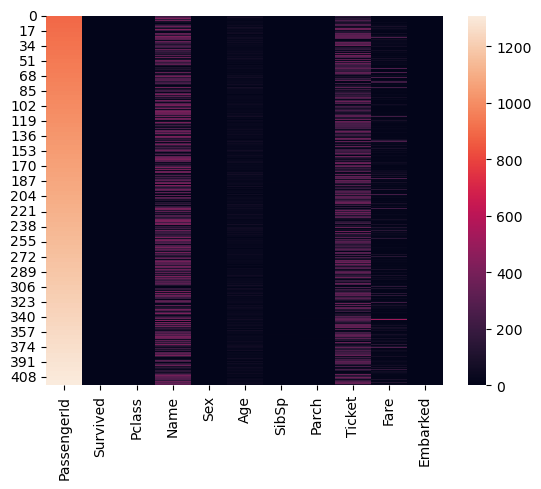

In [47]:
import seaborn as sns
sns.heatmap(df)
plt.show()

In [29]:
x = df.drop("Survived", axis = 1)
y = df['Survived']

In [30]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [32]:
lr.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

1.0